In [1]:
# importing cv2  
import pandas as pd
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
from scipy import stats
from scipy.stats import poisson

from sklearn.metrics import auc

from keras.models import load_model

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sn
import itertools
from matplotlib.gridspec import GridSpec

import pickle

Using TensorFlow backend.


In [2]:
def visualize_one_np(grid1):
    fig, ax = plt.subplots(1, figsize=(5, 5))
    ax.imshow(grid1, origin='lower')
    plt.axis('off')
    plt.show()
    
def visualize_two_np(grid1,grid2):
    fig, ax = plt.subplots(1,2, figsize=(10, 10))
    ax[0].imshow(grid1, origin='lower')
    ax[1].imshow(grid2, origin='lower')
    
    plt.show()
    
def visualize_three_np(grid1,grid2,grid3):
    fig, ax = plt.subplots(1,3, figsize=(15, 10))
    ax[0].imshow(grid1, origin='lower')
    ax[1].imshow(grid2, origin='lower')
    ax[2].imshow(grid3, origin='lower')
    
    plt.show()
    
def visualize_one_heatmap(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis', origin='lower')
    plt.colorbar()
    plt.show()

def visualize_two_heatmap(arr1: np.ndarray, arr2: np.ndarray):
    fig, (ax1, ax2, cax) = plt.subplots(ncols=3,figsize=(12,5), 
                  gridspec_kw={"width_ratios":[1,1,0.05]})
    fig.subplots_adjust(wspace=0.2)
    im1 = ax1.imshow(arr1, cmap='viridis', origin='lower')
    im2 = ax2.imshow(arr2, cmap='viridis', origin='lower')

    fig.colorbar(im1, cax=cax)
    
def visualize_ps_bins(grid2D):
    fig, ax = plt.subplots(1,5, figsize=(15,25))
    ax[0].imshow(grid2D[:,:,0], origin = "lower")
    ax[1].imshow(grid2D[:,:,1], origin = "lower")
    ax[2].imshow(grid2D[:,:,2], origin = "lower")
    ax[3].imshow(grid2D[:,:,3], origin = "lower")
    ax[4].imshow(grid2D[:,:,4], origin = "lower")
    
def visualize_grid_adaptable(grid2D):
   
    vmin_grid_0 = np.min(grid2D[:,:,0])
    vmax_grid_0 = np.max(grid2D[:,:,0])
    
    vmin_grid_1 = np.min(grid2D[:,:,1])
    vmax_grid_1 = np.max(grid2D[:,:,1])
    
    vmin_grid_2 = np.min(grid2D[:,:,2])
    vmax_grid_2 = np.max(grid2D[:,:,2])
    
    vmin_grid_3 = np.min(grid2D[:,:,3])
    vmax_grid_3 = np.max(grid2D[:,:,3])
    
    vmin_grid_4 = np.min(grid2D[:,:,4])
    vmax_grid_4 = np.max(grid2D[:,:,4])
    
    fig, ax = plt.subplots(1,5, figsize=(15,25))
    ax[0].imshow(grid2D[:,:,0], origin = "lower", vmin=vmin_grid_0 , vmax=vmax_grid_0)
    ax[1].imshow(grid2D[:,:,1], origin = "lower", vmin=vmin_grid_1 , vmax=vmax_grid_1)
    ax[2].imshow(grid2D[:,:,2], origin = "lower", vmin=vmin_grid_2 , vmax=vmax_grid_2)
    ax[3].imshow(grid2D[:,:,3], origin = "lower", vmin=vmin_grid_3 , vmax=vmax_grid_3)
    ax[4].imshow(grid2D[:,:,4], origin = "lower", vmin=vmin_grid_4 , vmax=vmax_grid_4)
    
    # Make an axis for the colorbar on the right side
    #cax = fig.add_axes([0.92, 0.462, 0.01, 0.082])
    #fig.colorbar(im, cax=cax)
    
    print(np.min(grid2D[:,:,0]), np.max(grid2D[:,:,0]), grid2D[3,3,0])
    print(np.min(grid2D[:,:,1]), np.max(grid2D[:,:,1]), grid2D[3,3,1])
    print(np.min(grid2D[:,:,2]), np.max(grid2D[:,:,2]), grid2D[3,3,2])
    print(np.min(grid2D[:,:,3]), np.max(grid2D[:,:,3]), grid2D[3,3,3])
    print(np.min(grid2D[:,:,4]), np.max(grid2D[:,:,4]), grid2D[3,3,4])

In [3]:
#from kaggle https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          snr_message=r"$SNR_c$ all"):
    
    plt.rcParams["axes.grid"] = False
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    #plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize=12)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize=12)


    plt.tight_layout()
    plt.ylabel('True label', fontsize=16)
    #plt.xlabel('Predicted label\n\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass), fontsize=16)
    
    plt.xlabel(f"Predicted label ({snr_message})", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    #axis.yaxis.grid(True, which='minor')
    #axis.xaxis.grid(True, which='minor')
    plt.show()
    
    return 0

#### Classify point sources using the info from stat files

In [5]:
def get_samples(ims):
    return (poisson.rvs(ims) - norm_mean) / norm_std

def classify_patch_stat(patch, test_image_npy, ps_position, id_class, distance_dg, cnn_model, snr_center):
    
    image_name = f"test_image_{patch}.npy"
    
    #dimensions of test_image_poisson
    xsize = 64
    
    #box dimensions
    r_b=7
    box_inf = 3
    box_sup = 4
    
    #number of point source with positions in xmin, xmax, ymin, ymax format
    ps_length = len(ps_position)
    
    #list of point source patches when is possible
    ps_patch_asimov_list = np.zeros((ps_length, 7, 7, 5))
    ps_patch_poisson_list = np.zeros((ps_length, 7, 7, 5))
    
    #list of test adn predictions and extra data to compare with ROC-AUC data
    ps_pred_list = np.zeros((ps_length, 15), dtype=object)
    
    for ps_number in range(ps_length):
    
        #print(id_class)
        #print(ps_number, ps_length, id_class.iloc[ps_number])
        id_ps = id_class.iloc[ps_number]

        x_ps = int(ps_position["pred_x"].iloc[ps_number])
        y_ps = int(ps_position["pred_y"].iloc[ps_number])

        snr_ct = snr_center.iloc[ps_number]
        
        #box around ps, for radius of 7x7
        xmin_b, xmax_b, ymin_b, ymax_b = max(0,x_ps-box_inf),min(xsize,x_ps+box_sup),\
                                         max(0,y_ps-box_inf),min(xsize,y_ps+box_sup)

        prob_test_agn = 0
        prob_test_psr = 0
        prob_test_fake = 0
        
        ps_pred_list[ps_number,0] = image_name
        ps_pred_list[ps_number,1] = id_ps
        ps_pred_list[ps_number,2] = x_ps
        ps_pred_list[ps_number,3] = x_ps
        ps_pred_list[ps_number,4] = y_ps
        ps_pred_list[ps_number,5] = y_ps
        ps_pred_list[ps_number,13] = distance_dg.iloc[ps_number]
        ps_pred_list[ps_number,14] = snr_center.iloc[ps_number]
        
        ps_patch_test = np.zeros((1,7,7,5))
        
        #if ( x_ps >= 3 or x_ps <= 61 or y_ps >= 3 or y_ps <= 61 ):
        if (((xmax_b-xmin_b) == r_b) and ((ymax_b-ymin_b) == r_b)):
            #ps patch from 64x64 asimov (for future comparison) and poisson patch  
            ps_patch_asimov = test_image_npy[ymin_b:ymax_b, xmin_b:xmax_b]
            
            #ps_patch_poisson = np.random.poisson(ps_patch_asimov, ps_patch_asimov.shape).astype(float)
            ps_patch_poisson = (poisson.rvs(ps_patch_asimov) - norm_mean) / norm_std
            
            #dataset with one position just to evaluate with cnn_predict
            ps_patch_test[0,:,:,:] = ps_patch_poisson[:,:,:]
            
            #list of patches for future use
            ps_patch_asimov_list[ps_number, :, :, :] = ps_patch_asimov[:,:,:]
            ps_patch_poisson_list[ps_number, :, :, :] = ps_patch_poisson[:,:,:]
            
            #one-hot encoder of test id_class
            if int(id_ps) == 0:
                prob_test_agn = 1
            if int(id_ps) == 1:   
                prob_test_psr = 1
            if int(id_ps) == 2:
                prob_test_fake = 1
                
            #cnn prediction on one ps patch
            
            
            ps_pred_prob = cnn_model.predict(ps_patch_test)
                
            ps_pred_list[ps_number,6] = 1 #7x7 box
            
            ps_pred_list[ps_number,7] = prob_test_agn
            ps_pred_list[ps_number,8] = prob_test_psr
            ps_pred_list[ps_number,9] = prob_test_fake
                
            ps_pred_list[ps_number,10] = ps_pred_prob[0,0]
            ps_pred_list[ps_number,11] = ps_pred_prob[0,1]
            ps_pred_list[ps_number,12] = ps_pred_prob[0,2]
            
            
        else:
            ps_pred_list[ps_number,6] = 0
            
    return ps_patch_asimov_list, ps_patch_poisson_list, ps_pred_list

def dataset_load_and_classification_stat(path_to_test, path_to_stat_csv, model_class):

    stat_df = pd.read_csv(f"{path_to_stat_csv}", sep=",")

    files = stat_df["patch_number"].unique()

    X_p = np.zeros((len(files), xsize, xsize, 5), dtype=float)
    Y_p = np.zeros((len(files), xsize, xsize, 2), dtype=float)
    
    #full list of predictions and patches in the point source basis
    ps_pred_global_list = []
   
    ps_patch_asimov_global_list = []
    ps_patch_poisson_global_list = []
    
    for patch in range(len(files)):

        #id class and position of tp and fp
        
        sub_stat_df = stat_df[((stat_file["patch_number"]== patch*1.0) & (stat_file["stat_code"]!=2))]
        
        id_class    = sub_stat_df.iloc[:,13]
        position    = sub_stat_df.iloc[:,11:13]
        distance_dg = sub_stat_df.iloc[:,6]
        
        #check this since the format of the stat file is changing
        snr_center  = sub_stat_df.iloc[:,-5]
        
        test_asimov_image_npy = np.load(f"{path_to_test}/test_image_{patch}.npy")
        test_masks_npy = np.load(f"{path_to_test}/test_masks_{patch}.npy")
        test_image_npy = test_asimov_image_npy[0,:,:,:] + test_asimov_image_npy[1,:,:,:] + test_asimov_image_npy[2,:,:,:] 
    
        
        #classify the point sources in poisson patch
        ps_patch_asimov_list, ps_patch_poisson_list, ps_pred_list = classify_patch_stat(patch,
                                                                                        test_image_npy, position, 
                                                                                        id_class, distance_dg,
                                                                                        model_class, snr_center)

        test_image_poisson = np.random.poisson(test_image_npy, test_image_npy.shape).astype(float)
        
        X_p[patch,:,:,:] = test_image_poisson[:,:,:]
        Y_p[patch,:,:,:] = test_masks_npy[:,:,:]
        
        ps_patch_asimov_global_list.append(ps_patch_asimov_list)
        ps_patch_poisson_global_list.append(ps_patch_poisson_list)
        
        ps_pred_global_list.append(ps_pred_list)
    
    #unet_pred_simulated = unet_model_poisson.predict(X_p, verbose=1)
    
    return X_p, Y_p, ps_patch_asimov_global_list, ps_patch_poisson_global_list, ps_pred_global_list #unet_pred_simulated

In [40]:
xsize  = 64

path_solid = f"/home/bapanes/Research-Now/Gamma-Ray-Point-Source-Detector"

cnn_model_file = f"{path_solid}/models/cnn_model.h5"
pkl_file = f"{path_solid}/models/standard_norm_vals.pkl"

with open(pkl_file,"rb") as f:
    [norm_mean, norm_std] = pickle.load(f)

In [41]:
path_to_test = f"{path_solid}/data-test/data-768-F0-B1"

path_to_test_csv = f"{path_to_test}/test.csv"
path_to_stat_csv = f"{path_solid}/outputs-csv/unek_evaluation_test.csv"

In [42]:
cnn_model = load_model(cnn_model_file)

In [43]:
stat_file = pd.read_csv(f"{path_to_stat_csv}", sep=",")

In [44]:
stat_file[((stat_file["stat_code"]==1))]

,stat_code,pred_con,pred_lon,pred_lat,test_lon,test_lat,distance_degree,distance_pixel,test_flux_1000,catalog,...,test_x,test_lon_patch,test_lat_patch,probability,test_flux_10000,snr_center_pred,class_ps,snr_center_test,sbr_center_pred,sbr_center_test
13,1.0,13.0,110.749046,88.767769,109.428358,85.871788,2.896447,18.788294,1.052663e-10,400.0,...,43.0,135.0,84.149733,0.177005,8.762012e-13,0.703147,0.0,1.172326,0.336407,0.710501
18,1.0,18.0,344.129696,79.782249,346.061740,81.085304,1.341850,8.246211,1.527258e-10,400.0,...,2.0,-45.0,84.149733,0.295420,1.878541e-11,43.079856,0.0,1.866212,17.784571,1.157412
21,1.0,21.0,328.031813,85.318962,323.596629,85.576886,0.436197,2.236068,9.034085e-11,400.0,...,27.0,-45.0,84.149733,0.201896,8.624861e-12,0.147417,0.0,1.155654,0.064255,0.650706
48,1.0,48.0,139.890045,79.172585,126.264546,78.898563,2.599961,16.124515,3.006456e-11,400.0,...,14.0,112.5,78.284148,0.275411,6.347299e-12,4.983970,0.0,0.370170,2.224701,0.179401
88,1.0,88.0,11.811967,81.201836,3.450296,82.323738,1.638522,10.049876,2.181540e-10,400.0,...,10.0,-22.5,78.284148,0.839573,7.560038e-11,24.116344,0.0,1.079489,11.085499,0.642370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,1.0,5656.0,80.427406,-87.376785,80.773979,-87.050222,0.326996,2.236068,2.606355e-10,400.0,...,20.0,45.0,-84.149733,0.531707,9.643177e-13,3.445334,0.0,2.555774,1.692649,2.264582
5667,1.0,5667.0,165.827240,-86.419815,166.624282,-83.857349,2.563294,15.811388,4.663595e-11,400.0,...,11.0,135.0,-84.149733,0.422657,2.618626e-12,0.014998,0.0,0.481892,0.006936,0.257500
5673,1.0,5673.0,284.648819,-84.256218,260.824052,-84.631176,2.319581,14.212670,1.946559e-10,400.0,...,11.0,-135.0,-84.149733,0.244702,7.365080e-12,9.542598,0.0,1.596255,4.333750,1.003361
5677,1.0,5677.0,312.867836,-88.953697,298.784723,-85.862066,3.133421,19.313208,2.073714e-09,400.0,...,39.0,-45.0,-84.149733,0.262869,2.194623e-10,0.767124,0.0,5.372315,0.359645,7.084894


#### Notice that false positives are also generated by probability threshold, which is not recorded in the the stat file

#### cnn predictions on dataset, we added another column to ps_pred_list

In [45]:
X_p, Y_p, ps_patch_asimov_list, ps_patch_poisson_list, ps_pred_list = dataset_load_and_classification_stat(path_to_test, path_to_stat_csv, cnn_model)

In [46]:
print(ps_patch_asimov_list[0].shape, ps_patch_poisson_list[0].shape, ps_pred_list[0].shape)

print(len(ps_patch_asimov_list), len(ps_patch_poisson_list), len(ps_pred_list))

(8, 7, 7, 5) (8, 7, 7, 5) (8, 15)
768 768 768


In [47]:
flat_ps_patch_asimov_list = [item for sublist in ps_patch_asimov_list for item in sublist]
flat_ps_patch_poisson_list = [item for sublist in ps_patch_poisson_list for item in sublist]
flat_ps_pred_list = [item for sublist in ps_pred_list for item in sublist]

#in flat_ps_pred_list we add a counter
for con in range(len(flat_ps_pred_list)):
    flat_ps_pred_list[con] = np.append(flat_ps_pred_list[con],(con))
    #print(flat_ps_pred_list[con])

In [48]:
print(len(flat_ps_patch_asimov_list), flat_ps_patch_asimov_list[0].shape)
print(len(flat_ps_patch_poisson_list), flat_ps_patch_poisson_list[0].shape)
print(len(flat_ps_pred_list), flat_ps_pred_list[0].shape)

5693 (7, 7, 5)
5693 (7, 7, 5)
5693 (16,)


#### Let us remember the structure of ps_pred_list

### Standard pipeline

In [49]:
flat_ps_patch_asimov_list = np.array(flat_ps_patch_asimov_list)
flat_ps_patch_asimov_list.shape

(5693, 7, 7, 5)

In [50]:
list_hot_test = []
list_hot_pred = []

for con_1 in range(len(flat_ps_pred_list)):
    if (con_1 <= 10):
        print("%s %d %d %d %d %d %d %d %d %d %.2f %.2f %.2f %.2f %.2f"%(flat_ps_pred_list[con_1][0],flat_ps_pred_list[con_1][1],
                                                              flat_ps_pred_list[con_1][2],flat_ps_pred_list[con_1][3],
                                                              flat_ps_pred_list[con_1][4],flat_ps_pred_list[con_1][5],
                                                              flat_ps_pred_list[con_1][6],flat_ps_pred_list[con_1][7],
                                                              flat_ps_pred_list[con_1][8],flat_ps_pred_list[con_1][9],
                                                              flat_ps_pred_list[con_1][10],flat_ps_pred_list[con_1][11],
                                                              flat_ps_pred_list[con_1][12],flat_ps_pred_list[con_1][13],
                                                              flat_ps_pred_list[con_1][14]))
    #we consider only those sources with 7x7 box
    if (flat_ps_pred_list[con_1][6] == 1):
            
        list_hot_test.append([flat_ps_pred_list[con_1][7],flat_ps_pred_list[con_1][8],
                              flat_ps_pred_list[con_1][9], flat_ps_pred_list[con_1][14]])
            
        list_hot_pred.append([flat_ps_pred_list[con_1][10],flat_ps_pred_list[con_1][11],
                              flat_ps_pred_list[con_1][12], flat_ps_pred_list[con_1][14]])
        
        

cnn_test = np.array(list_hot_test).flatten()
cnn_pred = np.array(list_hot_pred).flatten()

test_image_0.npy 0 24 24 7 7 1 1 0 0 0.89 0.11 0.00 0.06 16.09
test_image_0.npy 0 2 2 12 12 0 0 0 0 0.00 0.00 0.00 0.09 12.76
test_image_0.npy 0 39 39 17 17 1 1 0 0 0.85 0.14 0.01 0.11 6.58
test_image_0.npy 0 50 50 20 20 1 1 0 0 0.86 0.09 0.05 0.20 3.47
test_image_0.npy 0 61 61 21 21 0 0 0 0 0.00 0.00 0.00 0.15 24.12
test_image_0.npy 0 17 17 23 23 1 1 0 0 0.78 0.22 0.00 0.10 19.80
test_image_0.npy 0 39 39 31 31 1 1 0 0 0.50 0.50 0.00 0.02 31.35
test_image_0.npy 0 17 17 38 38 1 1 0 0 0.77 0.07 0.16 0.15 5.32
test_image_1.npy 0 25 25 1 1 0 0 0 0 0.00 0.00 0.00 0.08 5.61
test_image_1.npy 0 47 47 1 1 0 0 0 0 0.00 0.00 0.00 0.04 4.16
test_image_1.npy 0 34 34 32 32 1 1 0 0 0.61 0.39 0.00 0.12 73.04


In [51]:
list_hot_pred[1][:3]

[0.84924203, 0.14421274, 0.006545208]

#### Definition of SNR intervals

In [52]:
match = 0
match_psr  = 0
match_agn  = 0
match_fake = 0

total_agn  = 0
total_psr  = 0
total_fake = 0

list_class_test = []
list_class_pred = []

list_class_snr_1_test = []
list_class_snr_2_test = []
list_class_snr_3_test = []

list_class_snr_1_pred = []
list_class_snr_2_pred = []
list_class_snr_3_pred = []

snr_b1 = 2.7
snr_b2 = 5.8

for con in range(len(list_hot_test)):
    
    hot_pos_test = np.argmax(list_hot_test[con][:3])
    hot_pos_pred = np.argmax(list_hot_pred[con][:3])
    
    #the following two lists are useful to build the confussion matrix
    list_class_test.append(hot_pos_test)
    list_class_pred.append(hot_pos_pred)
    
    if list_hot_test[con][3] < snr_b1:
        list_class_snr_1_test.append(hot_pos_test)
        list_class_snr_1_pred.append(hot_pos_pred)
        
    if ((list_hot_test[con][3] >= snr_b1) and (list_hot_test[con][3] <snr_b2)):
        list_class_snr_2_test.append(hot_pos_test)
        list_class_snr_2_pred.append(hot_pos_pred)
        
    if list_hot_test[con][3] > snr_b2:
        list_class_snr_3_test.append(hot_pos_test)
        list_class_snr_3_pred.append(hot_pos_pred)
    
    #match percentage by type
    if hot_pos_test == 0:
        if (hot_pos_pred == hot_pos_test):
            match = match + 1
            match_agn = match_agn+1
        
        total_agn = total_agn+1
            
    if hot_pos_test == 1:
        if (hot_pos_pred == hot_pos_test):
            match = match + 1
            match_psr = match_psr+1
        
        total_psr = total_psr+1
        
    if hot_pos_test == 2:
        if (hot_pos_pred == hot_pos_test):
            match = match + 1
            match_fake = match_fake+1
        
        total_fake = total_fake+1
        
print("%d %d %.2f %d %d %.2f %d %d %.2f %d %d %.2f"%(len(list_hot_test), match, match/len(list_hot_test), 
                                                     total_agn, match_agn,  match_agn/total_agn,
                                                     total_psr, match_psr, match_psr/total_psr,
                                                     total_fake, match_fake, match_fake/total_fake))

print("SNR_1 interval: ", len(list_class_snr_1_test))
print("SNR_2 interval: ", len(list_class_snr_2_test))
print("SNR_3 interval: ", len(list_class_snr_3_test))

4775 3395 0.71 3929 2740 0.70 419 335 0.80 427 320 0.75
SNR_1 interval:  1788
SNR_2 interval:  1420
SNR_3 interval:  1567


In [53]:
4560/3

1520.0

In [54]:
print(len(list_class_snr_1_pred), len(list_class_snr_2_pred), len(list_class_snr_3_pred))

1788 1420 1567


In [55]:
list_hot_test = np.array(list_hot_test)
list_hot_test.shape

(4775, 4)

In [56]:
list_hot_pred = np.array(list_hot_pred)
list_hot_pred.shape

(4775, 4)

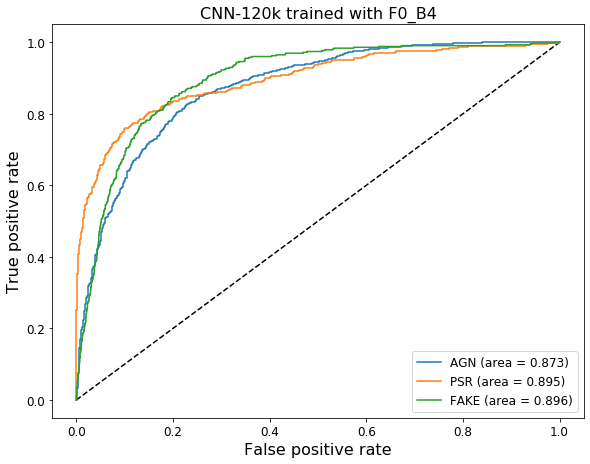

In [57]:
pred_flat_agn = np.array(list_hot_pred[:,0]).flatten()
Y_flat_agn = np.array(list_hot_test[:,0]).flatten()

pred_flat_psr = np.array(list_hot_pred[:,1]).flatten()
Y_flat_psr = np.array(list_hot_test[:,1]).flatten()

pred_flat_fake = np.array(list_hot_pred[:,2]).flatten()
Y_flat_fake = np.array(list_hot_test[:,2]).flatten()

pred_flat = np.array(list_hot_pred).flatten()
Y_flat = np.array(list_hot_test).flatten()

fpr_keras_agn, tpr_keras_agn, thresholds_keras_agn = roc_curve(Y_flat_agn, pred_flat_agn)
fpr_keras_psr, tpr_keras_psr, thresholds_keras_psr = roc_curve(Y_flat_psr, pred_flat_psr)
fpr_keras_fake, tpr_keras_fake, thresholds_keras_fake = roc_curve(Y_flat_fake, pred_flat_fake)
#fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_flat, pred_flat)

auc_keras_agn = auc(fpr_keras_agn, tpr_keras_agn)
auc_keras_psr = auc(fpr_keras_psr, tpr_keras_psr)
auc_keras_fake = auc(fpr_keras_fake, tpr_keras_fake)
#auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')

#plt.plot(fpr_keras, tpr_keras, label='Three types (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras_agn, tpr_keras_agn, label='AGN (area = {:.3f})'.format(auc_keras_agn))
plt.plot(fpr_keras_psr, tpr_keras_psr, label='PSR (area = {:.3f})'.format(auc_keras_psr))
plt.plot(fpr_keras_fake, tpr_keras_fake, label='FAKE (area = {:.3f})'.format(auc_keras_fake))

#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.tight_layout()
plt.xlabel('False positive rate', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.title('CNN-120k trained with F0_B4', fontsize=16)
plt.legend(loc='lower right', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [58]:
print(len(Y_flat), len(pred_flat))

19100 19100


#### Confusion matrix

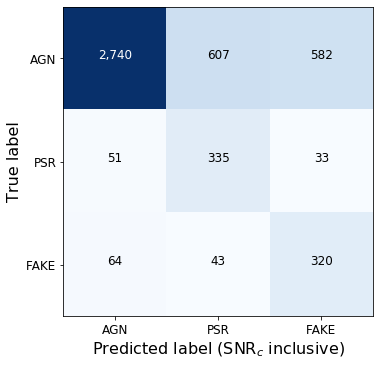

0

In [59]:
snr_message = fr"SNR$_c$ inclusive"

cm_array = confusion_matrix(list_class_test, list_class_pred)
plot_confusion_matrix(cm           = cm_array, 
                      normalize    = False,
                      target_names = ['AGN', 'PSR', 'FAKE'],
                      title        = "Confusion Matrix",
                      snr_message = snr_message)

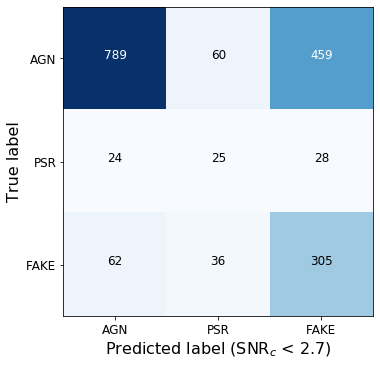

0

In [60]:
snr_message = fr"SNR$_c$ < {snr_b1}"

cm_array = confusion_matrix(list_class_snr_1_test, list_class_snr_1_pred)
plot_confusion_matrix(cm           = cm_array, 
                      normalize    = False,
                      target_names = ['AGN', 'PSR', 'FAKE'],
                      title        = "Confusion Matrix",
                      snr_message = snr_message)

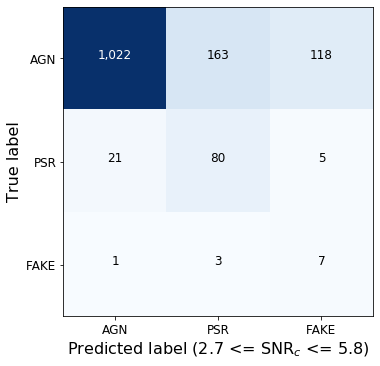

0

In [61]:
snr_message = fr"{snr_b1} <= SNR$_c$ <= {snr_b2}"

cm_array = confusion_matrix(list_class_snr_2_test, list_class_snr_2_pred)
plot_confusion_matrix(cm           = cm_array, 
                      normalize    = False,
                      target_names = ['AGN', 'PSR', 'FAKE'],
                      title        = "Confusion Matrix",
                      snr_message = snr_message)

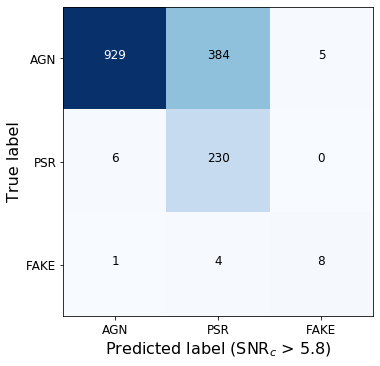

0

In [62]:
snr_message = fr"SNR$_c$ > {snr_b2}"

cm_array = confusion_matrix(list_class_snr_3_test, list_class_snr_3_pred)
plot_confusion_matrix(cm           = cm_array, 
                      normalize    = False,
                      target_names = ['AGN', 'PSR', 'FAKE'],
                      title        = "Confusion Matrix",
                    snr_message = snr_message)

#### Scatter plots

In [63]:
list_true_agn_prob = []
list_true_psr_prob = []
list_true_fake_prob = []

print(len(flat_ps_pred_list))

for con in range(len(flat_ps_pred_list)): 
       
    #we only consider ps with 7x7 box   
    if (flat_ps_pred_list[con][6] == 1):
        
        pred_prob_agn = flat_ps_pred_list[con][10]
        pred_prob_psr = flat_ps_pred_list[con][11]
        pred_prob_fake = flat_ps_pred_list[con][12]
        ps_snr_center = flat_ps_pred_list[con][14]
        
        #true agn
        if (int(flat_ps_pred_list[con][1]) == 0):
            list_true_agn_prob.append([pred_prob_agn, pred_prob_psr, ps_snr_center])
            
        #true psr
        if (int(flat_ps_pred_list[con][1]) == 1):
            list_true_psr_prob.append([pred_prob_agn, pred_prob_psr, ps_snr_center])
            
        #true fake (false positive unek)
        if (int(flat_ps_pred_list[con][1]) == 2):
            list_true_fake_prob.append([pred_prob_agn, pred_prob_psr, ps_snr_center])
        
        
list_true_agn_prob = np.array(list_true_agn_prob)
list_true_psr_prob = np.array(list_true_psr_prob)
list_true_fake_prob = np.array(list_true_fake_prob)

print(len(list_true_agn_prob), len(list_true_psr_prob), len(list_true_fake_prob))

5693
3929 419 427


#### SNR histogram

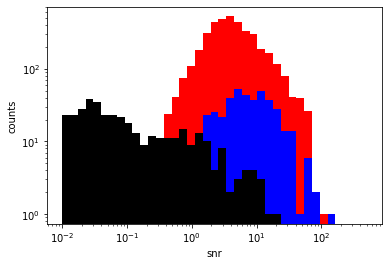

In [64]:
plt.hist(list_true_agn_prob[:,2], bins=np.logspace(np.log10(0.01),np.log10(500), 40), color="red")
plt.hist(list_true_psr_prob[:,2], bins=np.logspace(np.log10(0.01),np.log10(500), 40), color="blue")
plt.hist(list_true_fake_prob[:,2], bins=np.logspace(np.log10(0.01),np.log10(500), 40), color="black")

plt.gca().set_xscale("log")

plt.gca().set_yscale("log")

plt.xlabel("snr")
plt.ylabel("counts")

plt.show()

In [65]:
print(len(list_true_agn_prob), len(list_true_psr_prob), len(list_true_fake_prob))

3929 419 427


#### For all SNR values

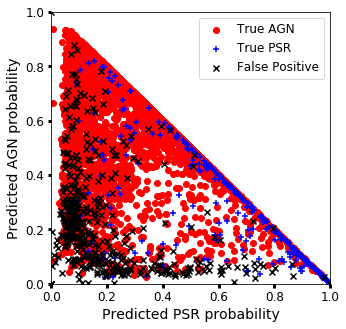

In [66]:
fig, ax = plt.subplots(1, figsize=(5, 5))
   
list_agn_prob = list_true_agn_prob   
list_psr_prob = list_true_psr_prob
list_fake_prob = list_true_fake_prob
    
#for con in range(len(list_fake_prob)):    
#    ax.plot(list_fake_prob[con,1], list_fake_prob[con,0], marker="o", c="blue")      

ax.scatter(list_agn_prob[:,1], list_agn_prob[:,0], color="red", marker="o", label="True AGN")
ax.scatter(list_psr_prob[:,1], list_psr_prob[:,0], color="blue", marker="+", label="True PSR")    
ax.scatter(list_fake_prob[:,1], list_fake_prob[:,0], color="black", marker="x", label="False Positive")   
    
ax.legend(loc='upper right', fontsize='large')
    
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)


ax.tick_params(labelcolor='black', labelsize='large', width=3)
ax.set_ylabel("Predicted AGN probability", fontsize=14)
ax.set_xlabel("Predicted PSR probability", fontsize=14)
    
#plt.grid(True)
#ax.axhline(0.9, lw=0.8)
#ax.axvline(vthreshold[0], lw=0.8)
#ax.text(0.2, 0.6, f"|b| < {lat_th}°", fontsize=14)
plt.show() 
    

In [67]:
def plot_scatter_density(list_1, list_2, list_3, scatter_snr_title, density_bins, density_cond):
    
    fig = plt.figure(figsize = (8,8))

    list_agn_prob = list_1   
    list_psr_prob = list_2
    list_fake_prob = list_3

    x = list_agn_prob[:,1]
    y = list_agn_prob[:,0]

    x1 = list_psr_prob[:,1]
    y1 = list_psr_prob[:,0]

    x2 = list_fake_prob[:,1]
    y2 = list_fake_prob[:,0]

    #arbitrary normalization
    hist_x, bins_x = np.histogram(x, density=False, bins=density_bins, range=(0,1))
    weights_x = hist_x/np.max(hist_x)
    
    hist_y, bins_y = np.histogram(y, density=False, bins=density_bins, range=(0,1))
    weights_y = hist_y/np.max(hist_y)
    
    hist_x1, bins_x1 = np.histogram(x1, density=False, bins=density_bins, range=(0,1))
    weights_x1 = hist_x1/np.max(hist_x1)
    
    hist_y1, bins_y1 = np.histogram(y1, density=False, bins=density_bins, range=(0,1))
    weights_y1 = hist_y1/np.max(hist_y1)
    
    hist_x2, bins_x2 = np.histogram(x2, density=False, bins=density_bins, range=(0,1))
    weights_x2 = hist_x2/np.max(hist_x2)
    
    hist_y2, bins_y2 = np.histogram(y2, density=False, bins=density_bins, range=(0,1))
    weights_y2 = hist_y2/np.max(hist_y2)
    
    #print(bins_x2, bins_y2, hist_x2, hist_y2)
    
    invertir_eje_x = False
    invertir_eje_y = False

    gs = GridSpec(4,4)

    ax_joint = fig.add_subplot(gs[1:4,0:3])
    ax_marg_x = fig.add_subplot(gs[0,0:3])
    ax_marg_y = fig.add_subplot(gs[1:4,3])

    a = ax_joint.scatter(x,y, s = 10 , color="red", marker="o", label="True AGN", alpha=0.5)
    ax_joint.scatter(x1,y1, s = 10 , color="blue", marker="+", label="True PSR", alpha=0.5)
    ax_joint.scatter(x2,y2, s = 10 , color="black", marker="x", label="FAKE", alpha=0.5)

    ax_marg_x.hist(bins_x2[:-1], weights=weights_x2, bins=density_bins, align='mid',edgecolor='black', color="black", fill = True, density=density_cond, alpha=0.5, rwidth=1)
    ax_marg_y.hist(bins_y2[:-1], weights=weights_y2, orientation="horizontal", bins=density_bins, align='mid', edgecolor='black', color="black", fill = True, density=density_cond, alpha=0.5, rwidth=1)

    ax_marg_x.hist(bins_x[:-1], weights=weights_x, bins=density_bins,align='mid',edgecolor='red', color="red", fill = True, density=density_cond, alpha=0.5)
    ax_marg_y.hist(bins_y[:-1], weights=weights_y, orientation="horizontal",bins=density_bins,align='mid', edgecolor='red',color="red", fill = True, density=density_cond, alpha=0.5)

    ax_marg_x.hist(bins_x1[:-1], weights=weights_x1, bins=density_bins,align='mid',edgecolor='blue', color="blue", fill = True, density=density_cond, alpha=0.5)
    ax_marg_y.hist(bins_y1[:-1], weights=weights_y1, orientation="horizontal",bins=density_bins,align='mid',edgecolor='blue', color="blue", fill = True, density=density_cond, alpha=0.5)
    
    #ax_marg_x.hist(x2, bins=density_bins, align='mid',edgecolor='black', color="black", fill = True, density=density_cond, alpha=0.5)
    #ax_marg_y.hist(y2, orientation="horizontal",bins=density_bins,align='mid', edgecolor='black', color="black", alpha=0.5, fill = True, density=density_cond)

    #ax_marg_x.hist(x,bins=density_bins,align='mid',edgecolor='red', color="red", fill = True, density=density_cond, alpha=0.5)
    #ax_marg_y.hist(y,orientation="horizontal",bins=density_bins,align='mid', edgecolor='red',color="red", fill = True, density=density_cond, alpha=0.5)

    #ax_marg_x.hist(x1,bins=density_bins,align='mid',edgecolor='blue', color="blue", fill = True, density=density_cond, alpha=0.5)
    #ax_marg_y.hist(y1,orientation="horizontal",bins=density_bins,align='mid',edgecolor='blue', color="blue", fill = True, density=density_cond, alpha=0.5)

    # Turn off tick labels on marginals
    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(), visible=False)

    ax_marg_y.set_xticks([0,0.5,1.0])
    
    # Set labels on joint
    ax_joint.set_xlabel("Predicted PSR probability", fontsize = 14)
    ax_joint.set_ylabel(f"Predicted AGN probability", fontsize = 14)

    ax_joint.text(0.55, 0.6, scatter_snr_title, fontsize=14)
    
    if invertir_eje_x == True:
        ax_joint.invert_xaxis()
        ax_marg_x.invert_xaxis()
    if invertir_eje_y == True:
        ax_joint.invert_yaxis()
        ax_marg_y.invert_yaxis()

    ax_joint.tick_params(labelsize=14)
    ax_joint.tick_params(labelsize=14)
    ax_marg_y.tick_params(labelsize=14)
    ax_marg_x.tick_params(labelsize=14)

    #ax_marg_x.set_ylim(0,100)


    # Set labels on marginals
    ax_marg_y.set_xlabel('Counts (NU)', fontsize = 14) #margen x
    ax_marg_x.set_ylabel('Counts (NU)', fontsize = 14) #margen y
    
    ax_joint.legend(loc='upper right', fontsize=14, markerscale = 2)
    
    ax_joint.set_ylim(0, 1)
    ax_joint.set_xlim(0, 1)

    plt.show()

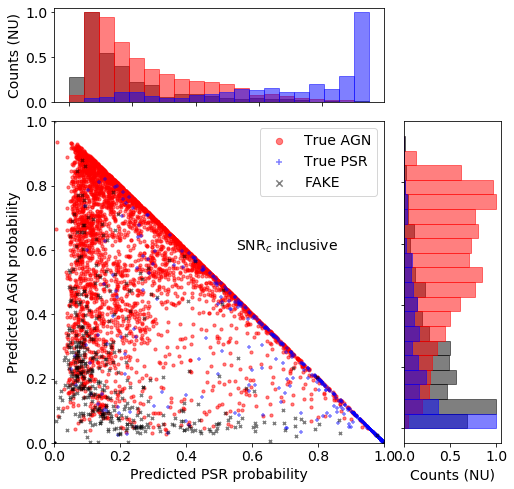

In [68]:
list_agn_prob = list_true_agn_prob   
list_psr_prob = list_true_psr_prob
list_fake_prob = list_true_fake_prob

plot_scatter_density(list_agn_prob, list_psr_prob, list_fake_prob, fr"SNR$_c$ inclusive", 20, False)

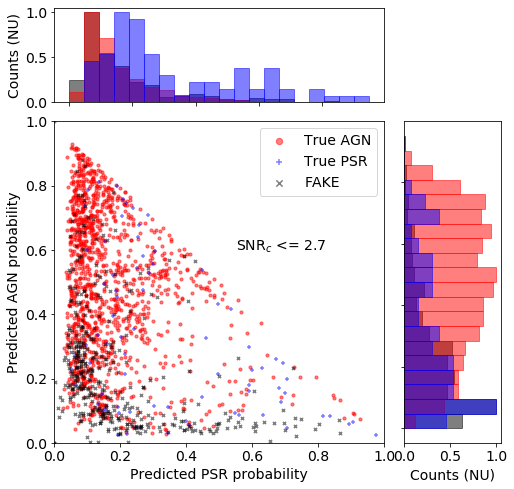

In [69]:
list_agn_prob = list_true_agn_prob[list_true_agn_prob[:,2]<snr_b1]    
list_psr_prob = list_true_psr_prob[list_true_psr_prob[:,2]<snr_b1]
list_fake_prob = list_true_fake_prob[list_true_fake_prob[:,2]<snr_b1]

plot_scatter_density(list_agn_prob, list_psr_prob, list_fake_prob, fr"SNR$_c$ <= {snr_b1}", 20, False)

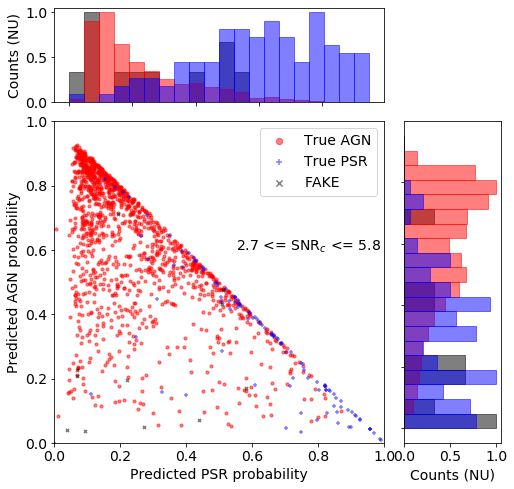

In [70]:
list_agn_prob = list_true_agn_prob[((list_true_agn_prob[:,2]>=snr_b1) & (list_true_agn_prob[:,2]<=snr_b2))]    
list_psr_prob = list_true_psr_prob[((list_true_psr_prob[:,2]>=snr_b1) & (list_true_psr_prob[:,2]<=snr_b2))]
list_fake_prob = list_true_fake_prob[((list_true_fake_prob[:,2]>=snr_b1) & (list_true_fake_prob[:,2]<=snr_b2))]

plot_scatter_density(list_agn_prob, list_psr_prob, list_fake_prob, fr"{snr_b1} <= SNR$_c$ <= {snr_b2}", 20, False)

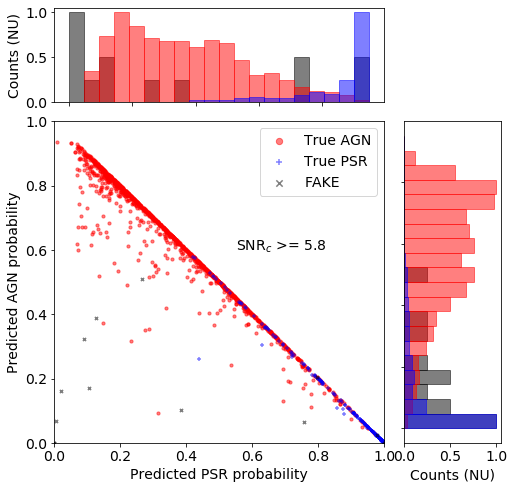

In [71]:
list_agn_prob = list_true_agn_prob[(list_true_agn_prob[:,2]>=snr_b2)]    
list_psr_prob = list_true_psr_prob[(list_true_psr_prob[:,2]>=snr_b2)]
list_fake_prob = list_true_fake_prob[(list_true_fake_prob[:,2]>=snr_b2)]

plot_scatter_density(list_agn_prob, list_psr_prob, list_fake_prob, fr"SNR$_c$ >= {snr_b2}", 20, False)

In [72]:
def prob_counts_plot(list_true_agn, list_true_psr, list_true_fake, nbins=30):
    
    list_agn_prob = list_true_agn   
    list_psr_prob = list_true_psr
    list_fake_prob = list_true_fake
    
    fig = plt.figure(figsize = (17,5))

    agn_pred_agn_prob = list_agn_prob[:,0]
    agn_pred_psr_prob = list_agn_prob[:,1]
    agn_pred_fake_prob = 1.0 - (agn_pred_agn_prob+agn_pred_psr_prob) 

    psr_pred_agn_prob = list_psr_prob[:,0]
    psr_pred_psr_prob = list_psr_prob[:,1]
    psr_pred_fake_prob = 1.0 - (psr_pred_agn_prob+psr_pred_psr_prob) 

    fake_pred_agn_prob = list_fake_prob[:,0]
    fake_pred_psr_prob = list_fake_prob[:,1]
    fake_pred_fake_prob = 1.0 - (fake_pred_agn_prob+fake_pred_psr_prob) 

    invertir_eje_x = False
    invertir_eje_y = False

    gs = GridSpec(1,3)

    #ax_joint = fig.add_subplot(gs[1:4,0:3])

    ax_marg_r1 = fig.add_subplot(gs[0,0])
    ax_marg_r2 = fig.add_subplot(gs[0,1])
    ax_marg_r3 = fig.add_subplot(gs[0,2])

    ax_marg_r1.hist(agn_pred_agn_prob, bins=nbins, align='mid',edgecolor='red', range=(0,1), color="red", fill = True, density=False, alpha=0.5, label="True AGN")
    ax_marg_r1.hist(psr_pred_agn_prob, bins=nbins, align='mid',edgecolor='blue', range=(0,1), color="blue", fill = True, density=False, alpha=0.5, label="True PSR")
    ax_marg_r1.hist(fake_pred_agn_prob, bins=nbins, align='mid',edgecolor='black', range=(0,1), color="black", fill = True, density=False, alpha=0.5, label="FAKE")

    ax_marg_r2.hist(agn_pred_psr_prob, bins=nbins, align='mid',edgecolor='red', range=(0,1), color="red", fill = True, density=False, alpha=0.5, label="True AGN")
    ax_marg_r2.hist(psr_pred_psr_prob, bins=nbins, align='mid',edgecolor='blue', range=(0,1), color="blue", fill = True, density=False, alpha=0.5, label="True PSR")
    ax_marg_r2.hist(fake_pred_psr_prob, bins=nbins, align='mid',edgecolor='black', range=(0,1), color="black", fill = True, density=False, alpha=0.5, label="FAKE")

    ax_marg_r3.hist(agn_pred_fake_prob, bins=nbins, align='mid',edgecolor='red', range=(0,1), color="red", fill = True, density=False, alpha=0.5, label="True AGN")
    ax_marg_r3.hist(psr_pred_fake_prob, bins=nbins, align='mid',edgecolor='blue', range=(0,1), color="blue", fill = True, density=False, alpha=0.5, label="True PSR")
    ax_marg_r3.hist(fake_pred_fake_prob, bins=nbins, align='mid',edgecolor='black', range=(0,1),color="black", fill = True, density=False, alpha=0.5, label="FAKE")

    ax_marg_r1.set_yscale('log')
    ax_marg_r1.set_ylim(0.5,10000)
    
    ax_marg_r2.set_yscale('log')
    ax_marg_r2.set_ylim(0.5,10000)
    
    ax_marg_r3.set_yscale('log')
    ax_marg_r3.set_ylim(0.5,10000)
    
    # Turn off tick labels on marginals
    #plt.setp(ax_marg_r1.get_xticklabels(), visible=False)
    #plt.setp(ax_marg_r2.get_xticklabels(), visible=False)

    ax_marg_r1.tick_params(labelsize=14)
    ax_marg_r2.tick_params(labelsize=14)
    ax_marg_r3.tick_params(labelsize=14)

    # Set labels on marginals
    ax_marg_r1.set_ylabel('Counts', fontsize = 16) #margen x
    #ax_marg_r2.set_ylabel('Counts', fontsize = 16) #margen x
    #ax_marg_r3.set_ylabel('Counts', fontsize = 16) #margen x
    
    ax_marg_r1.set_xlabel('Predicted AGN probability', fontsize = 16) #margen y
    ax_marg_r2.set_xlabel('Predicted PSR probability', fontsize = 16) #margen y
    ax_marg_r3.set_xlabel('Predicted FAKE probability', fontsize = 16) #margen y

    ax_marg_r1.legend(loc='upper right', fontsize=14, markerscale = 2)
    ax_marg_r2.legend(loc='upper right', fontsize=14, markerscale = 2)
    ax_marg_r3.legend(loc='upper right', fontsize=14, markerscale = 2)
    
    ax_marg_r1.set_xlim(0, 1)
    ax_marg_r2.set_xlim(0, 1)
    ax_marg_r3.set_xlim(0, 1)

    #ax_marg_r1.text(0.3,8, "Class = AGN")
    #ax_marg_r2.text(0.3,4.5, "Class = PSR")
    #ax_marg_r3.text(0.3,15, "Class = FAKE")

    plt.show()

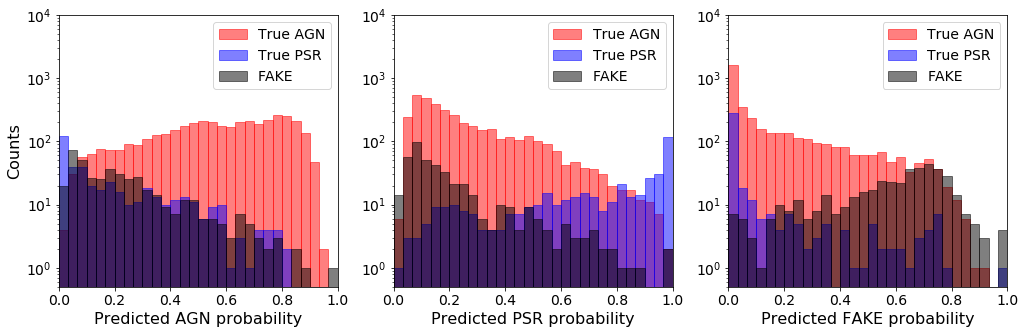

In [73]:
list_agn_prob = list_true_agn_prob   
list_psr_prob = list_true_psr_prob
list_fake_prob = list_true_fake_prob

prob_counts_plot(list_agn_prob, list_psr_prob, list_fake_prob, 30)